In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
cifar =  keras.datasets.cifar10

In [ ]:
(x_train, y_train),(x_test, y_test) = cifar.load_data()
print(x_train.shape)

170498071/170498071 [==============================] - 14s 0us/step
(50000, 32, 32, 3)


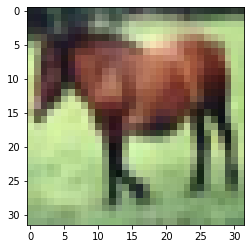

In [ ]:
plt.imshow(x_train[7])

In [ ]:
print(y_test[0])

[3]


In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
x_train_norm = x_train/255
x_test_norm = x_test/255

In [ ]:
x_train_norm.shape

(50000, 32, 32, 3)

In [ ]:
x_train_norm[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_cat_train  = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               8

Alert: This Will Take very Looooooooooooooooooooong Time to Complete

In [ ]:
model_history = model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test))

Epoch 1/10
1563/1563 [==============================] - 16s 6ms/step - loss: 1.8077 - accuracy: 0.3824 - val_loss: 1.4743 - val_accuracy: 0.4793
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3877 - accuracy: 0.5046 - val_loss: 1.4215 - val_accuracy: 0.4910
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2335 - accuracy: 0.5691 - val_loss: 1.2747 - val_accuracy: 0.5694
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1208 - accuracy: 0.6098 - val_loss: 1.3494 - val_accuracy: 0.5537
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0024 - accuracy: 0.6531 - val_loss: 1.1802 - val_accuracy: 0.6029
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8944 - accuracy: 0.6929 - val_loss: 1.1803 - val_accuracy: 0.6139
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7856 - accuracy: 0.7304 - val_loss: 1.2805 - val_accuracy